In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset.

The duration of the measurement was 117 seconds.

The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames.

Target:

1 indicates the eye-closed and
0 the eye-open state.
All values are in chronological order with the first measured value at the top of the data.

Reference link: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

In [59]:
##Download the dataset from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff

In [1]:
#!ls ./

In [12]:
##remove the top 19 lines
!tail -n 14980 "EEG Eye State.arff" > EEG_Eye_State_Classification.csv

In [13]:
df = pd.read_csv("./EEG_Eye_State_Classification.csv")

In [14]:
##adding the column names 
df.columns = ["AF3","F7","F3","FC5","T7","P7","O1","O2","P8","T8","FC6","F4","F8","AF4","eyeDetection"]

In [15]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [16]:
af4 = df['AF4']

In [17]:
#eyestate = df['eyeDetection']
#eyestate.values

(4100.0, 4800.0)

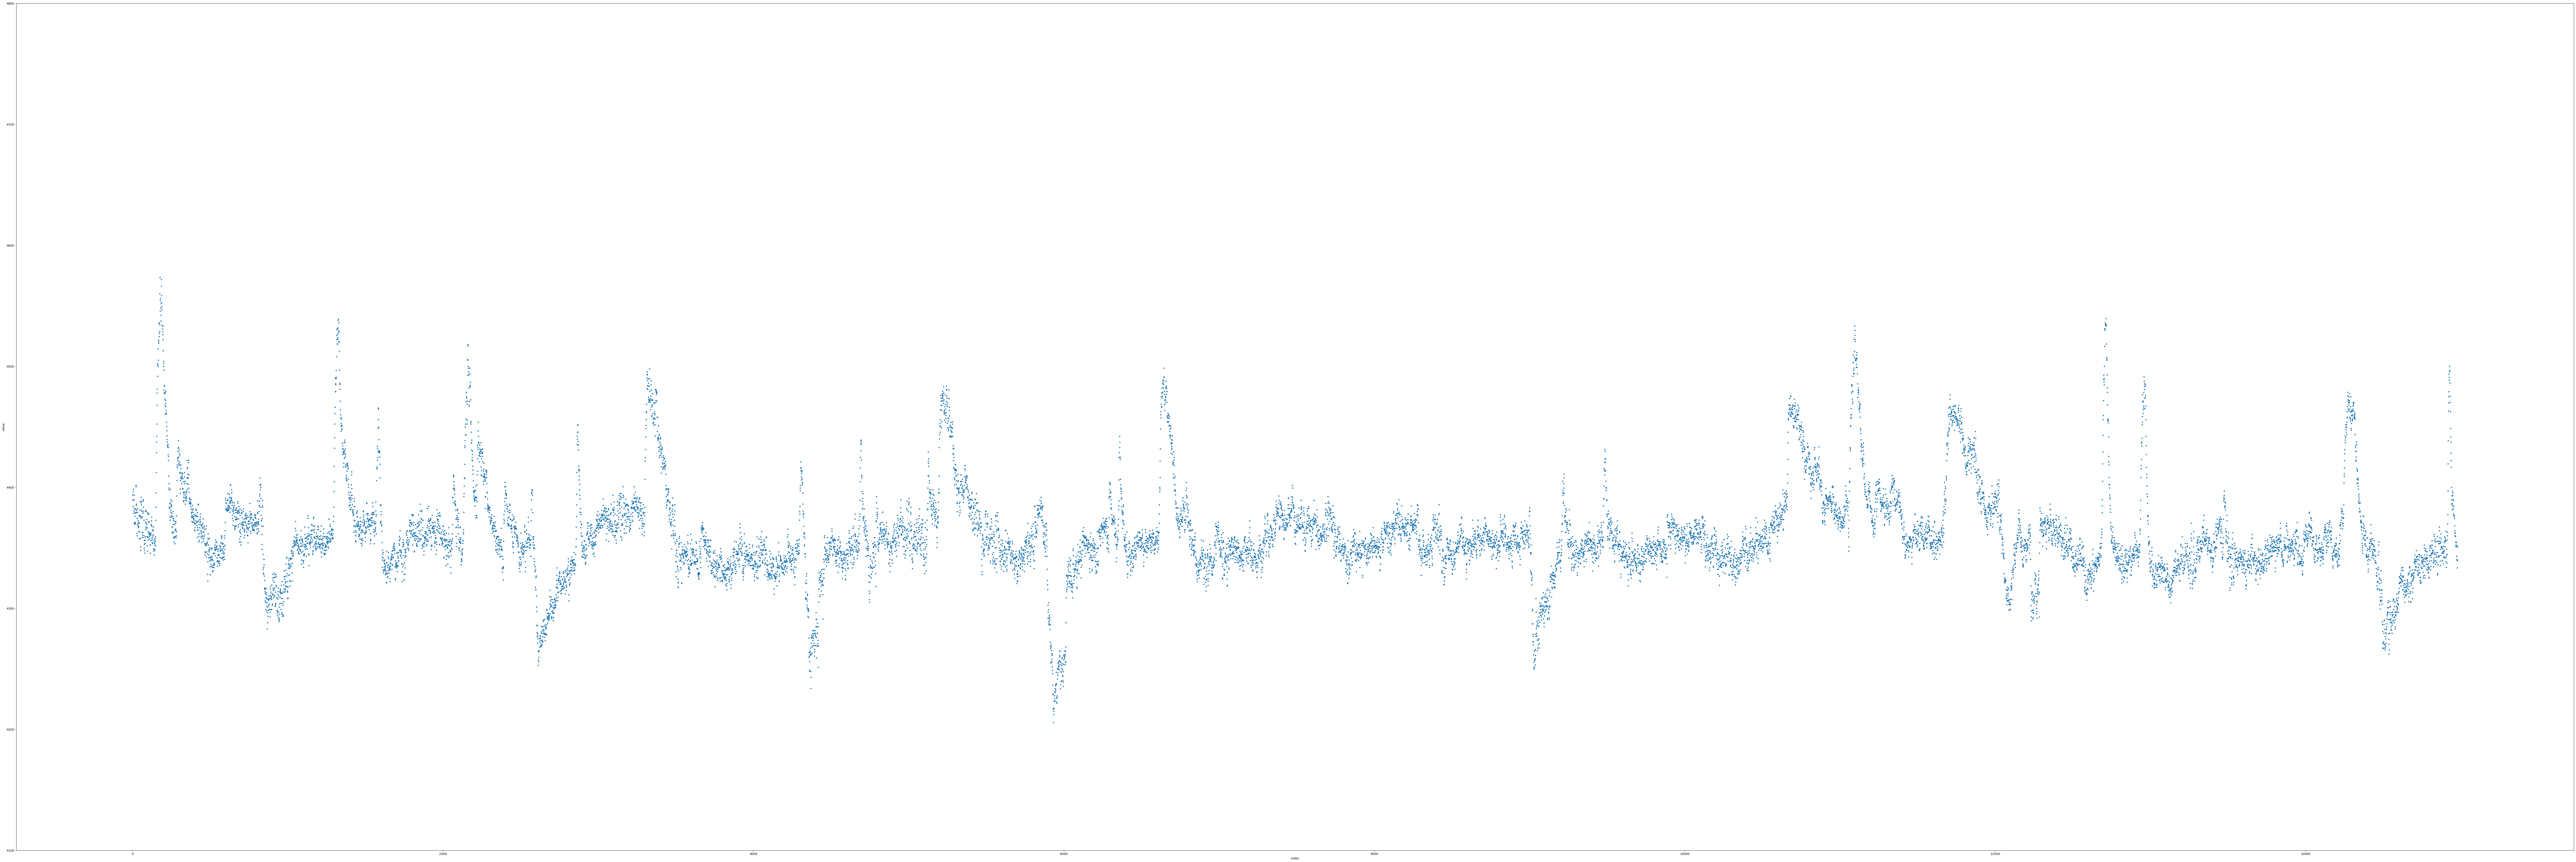

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
fig.set_figwidth(150)
fig.set_figheight(50)
ax.set_xlabel('index')
ax.set_ylabel('value')
ax.scatter(af4.index,af4.values, s=10, label = 'af4')
plt.ylim([4100,4800])

(4000.0, 4610.0)

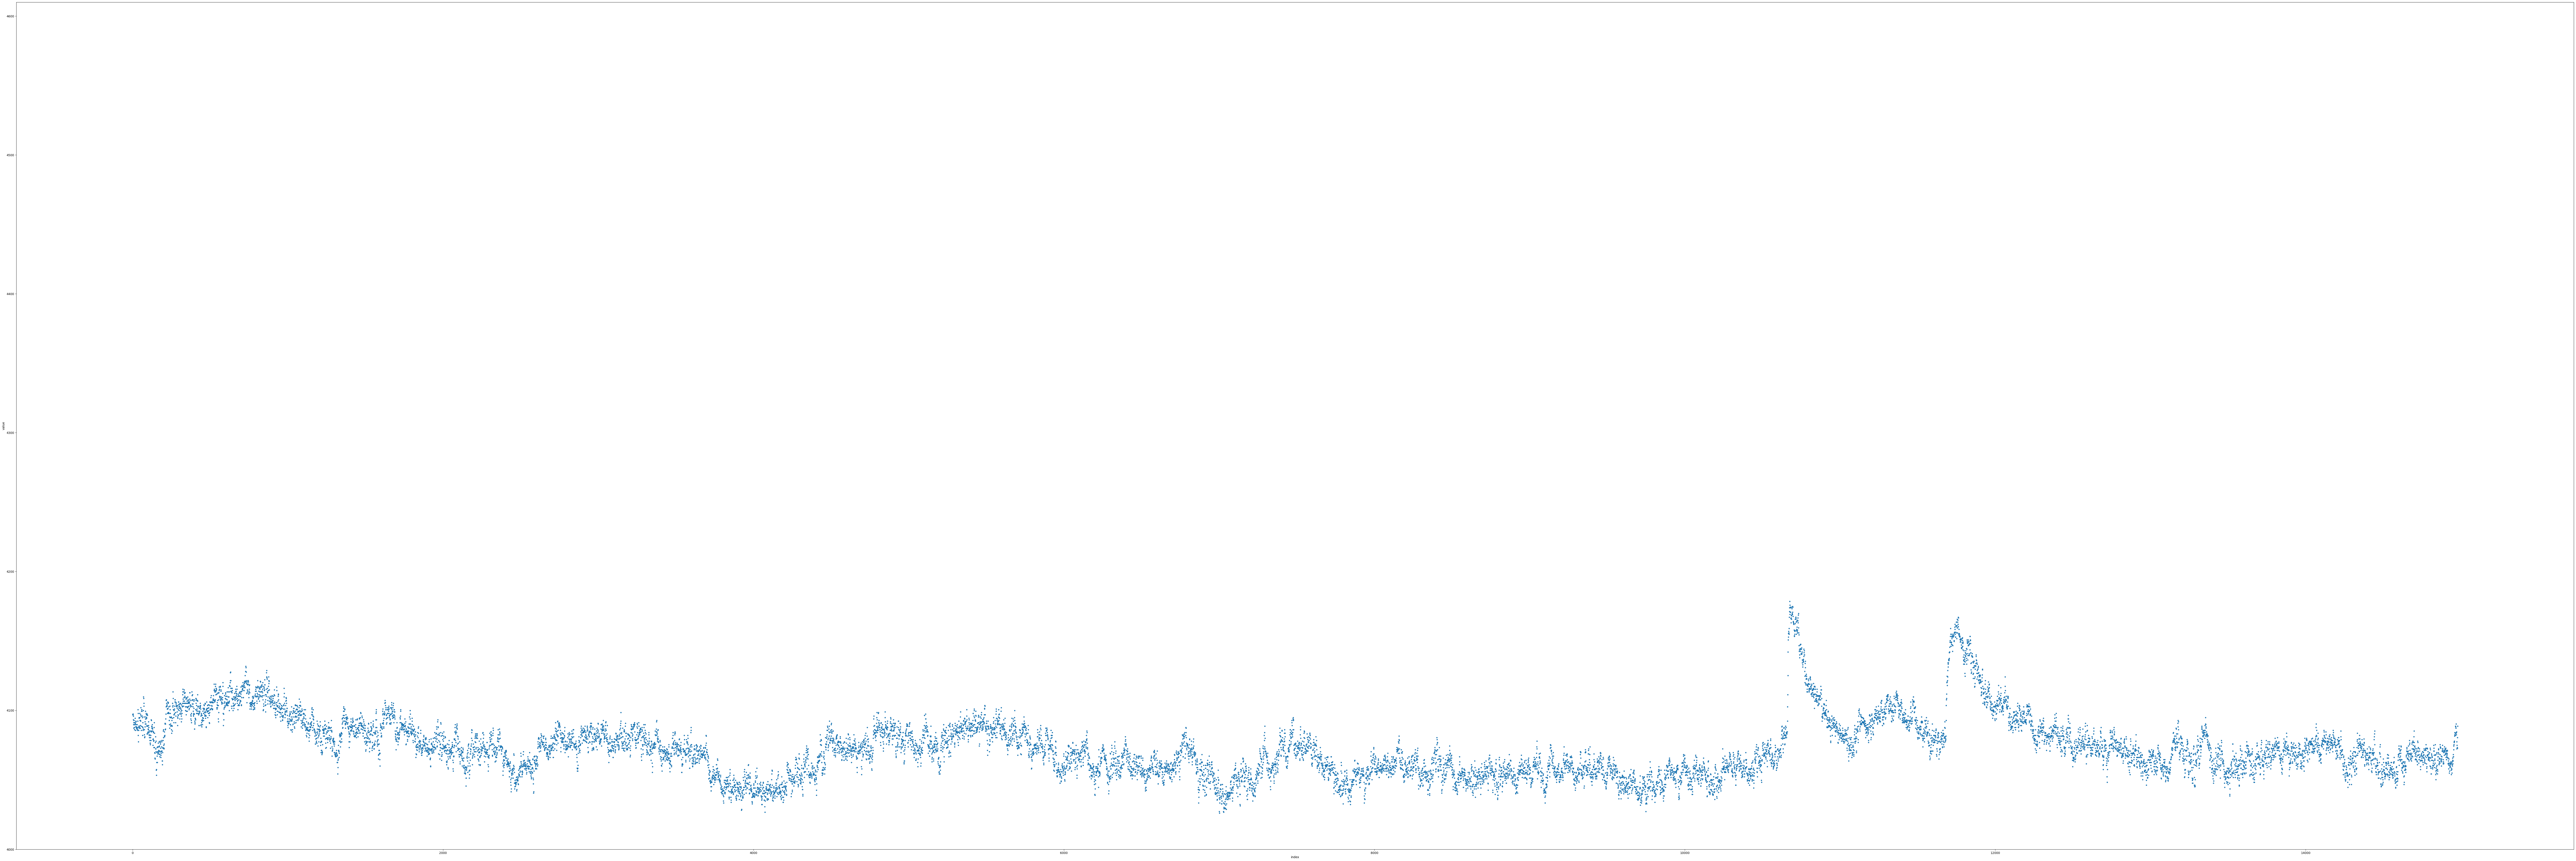

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
O1 = df['O1']
fig, ax = plt.subplots()
fig.set_figwidth(150)
fig.set_figheight(50)
ax.set_xlabel('index')
ax.set_ylabel('value')
ax.scatter(O1.index,O1.values, s=10, label = 'O1')
plt.ylim([4000,4610])

In [20]:
##find out if there's any missing data
df.isna().any()

AF3             False
F7              False
F3              False
FC5             False
T7              False
P7              False
O1              False
O2              False
P8              False
T8              False
FC6             False
F4              False
F8              False
AF4             False
eyeDetection    False
dtype: bool

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [22]:
##statistical information
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [23]:
##find out the balance of the two classes: eye_open and eye_close
eye_closed = df[df['eyeDetection'] == 1].count()
eye_open = df[df['eyeDetection'] == 0].count()
print(eye_closed, eye_open)

AF3             6723
F7              6723
F3              6723
FC5             6723
T7              6723
P7              6723
O1              6723
O2              6723
P8              6723
T8              6723
FC6             6723
F4              6723
F8              6723
AF4             6723
eyeDetection    6723
dtype: int64 AF3             8257
F7              8257
F3              8257
FC5             8257
T7              8257
P7              8257
O1              8257
O2              8257
P8              8257
T8              8257
FC6             8257
F4              8257
F8              8257
AF4             8257
eyeDetection    8257
dtype: int64


In [24]:
##get the labels/target
y = df['eyeDetection']
y

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64

In [25]:
##Features only
X = df.drop(columns=['eyeDetection'])
X

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [26]:
print(X.shape, y.shape)

(14980, 14) (14980,)


In [27]:
##separating 20% data out for testing and the rest are for training, randomly!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [28]:
X_train.shape

(11984, 14)

In [29]:
y_train.shape

(11984,)

In [30]:
X_test.shape

(2996, 14)

###Decision Tree

In [31]:
DTree_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=2)
DTree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                       random_state=2)

[Text(0.6165178571428571, 0.9375, 'O1 <= 4099.23\ngini = 0.495\nsamples = 11984\nvalue = [6566, 5418]\nclass = Rainy'),
 Text(0.36339285714285713, 0.8125, 'P7 <= 4617.695\ngini = 0.488\nsamples = 10755\nvalue = [6216, 4539]\nclass = Rainy'),
 Text(0.1767857142857143, 0.6875, 'F7 <= 4021.285\ngini = 0.499\nsamples = 5793\nvalue = [2746, 3047]\nclass = Sunny'),
 Text(0.09464285714285714, 0.5625, 'F4 <= 4264.36\ngini = 0.488\nsamples = 4668\nvalue = [1968, 2700]\nclass = Sunny'),
 Text(0.04642857142857143, 0.4375, 'O2 <= 4601.285\ngini = 0.478\nsamples = 1163\nvalue = [704, 459]\nclass = Rainy'),
 Text(0.02857142857142857, 0.3125, 'F8 <= 4594.615\ngini = 0.496\nsamples = 421\nvalue = [191, 230]\nclass = Sunny'),
 Text(0.014285714285714285, 0.1875, 'AF3 <= 4284.875\ngini = 0.491\nsamples = 292\nvalue = [166, 126]\nclass = Rainy'),
 Text(0.007142857142857143, 0.0625, 'gini = 0.432\nsamples = 215\nvalue = [147, 68]\nclass = Rainy'),
 Text(0.02142857142857143, 0.0625, 'gini = 0.372\nsamples =

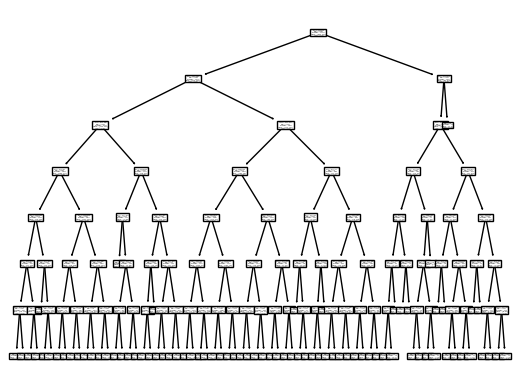

In [32]:
from sklearn import tree
from IPython.display import SVG
from IPython.display import display

names = X_train.columns
tree.plot_tree(DTree_clf, feature_names = names, class_names = ["Rainy", "Sunny"])

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4'],
      dtype='object')


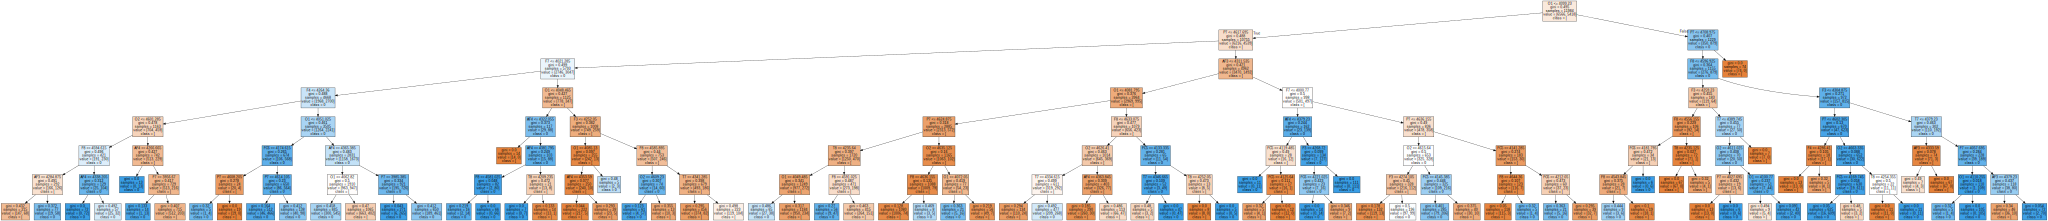

In [33]:
from graphviz import Source
names = X_train.columns
print(names)
graph = Source(tree.export_graphviz(DTree_clf ,feature_names = names, class_names = str(y.unique()), max_depth = 8, filled = True))
display(SVG(graph.pipe(format='svg')))

In [35]:
#get the prediction from the test data
y_predict = DTree_clf.predict(X_test)

In [36]:
#compare the prediction with the real data
accuracy_score(y_test, y_predict)

0.7606809078771696

In [37]:
##Use cross validation
from sklearn.model_selection import StratifiedKFold
skcv = StratifiedKFold(n_splits=3, shuffle=True)

In [38]:
##We'll try to tune the parameters of Decision Tree with Grid Search. Create a new classifier for the tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [10, 20, 30],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 20],
    "criterion": ['entropy','gini']
}
DTree_clf_cv = DecisionTreeClassifier()
grid_cv = GridSearchCV(DTree_clf_cv, param_grid, n_jobs=-1, cv=skcv, scoring="accuracy")
result = grid_cv.fit(X_train, y_train)

In [39]:
result.best_score_

0.8175072370758891

In [40]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [41]:
##with cross validation
DTree_clf = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=10, min_samples_leaf=5, random_state=2)
DTree_clf.fit(X_train, y_train)

y_predict = DTree_clf.predict(X_test)
accuracy_score(y_test, y_predict)

##use cross_val_score to see accuracy of each cross-validation portion
#cv_scores = cross_val_score(DTree_clf, X, y, cv=skcv, scoring='accuracy')
#print(cv_scores)

0.8344459279038718

###Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RForest_clf = RandomForestClassifier(random_state=2) ##n_estimators=100
RForest_clf.fit(X_train, y_train)
y_predict = RForest_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9312416555407209

###AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ABoost_clf = AdaBoostClassifier(random_state=2)
ABoost_clf.fit(X_train, y_train)
y_predict = ABoost_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.7456608811748998

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ABoost_clf_search = AdaBoostClassifier(random_state=2)
param_grid = {
    "n_estimators" : [100,200,350,500],
    "learning_rate" : [0.3, 0.7, 1] #0.1-1.0
}
grid_cv = GridSearchCV(ABoost_clf_search, param_grid, n_jobs=-1, cv=skcv, scoring="accuracy")
result = grid_cv.fit(X_train, y_train)

In [45]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7703603381710029
{'learning_rate': 0.7, 'n_estimators': 500}


###Gradient Boost

In [ ]:
##Use RandomizedSearchCV to tune the parameter  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import loguniform as sp_loguniform
from scipy.stats import uniform as sp_randfloat
from scipy.stats import randint as sp_randint

GB_clf = GradientBoostingClassifier(validation_fraction=0.1, n_iter_no_change=5,
                                  tol=0.01, verbose=5)
#tol: Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations
#(if set to a number), the training stops. Values must be in the range [0.0, inf)

parameters = {'learning_rate': sp_randfloat(0.1,1.0),
                'subsample'    : sp_randfloat(0.0,1.0),
                'n_estimators' : sp_randint(100, 1000),
                'max_depth'    : sp_randint(5, 40)
                 }

RandomSearch = RandomizedSearchCV(estimator=GB_clf, param_distributions=parameters, 
                                  scoring="accuracy", cv=skcv, n_iter = 20, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [ ]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

###XGBoost

In [48]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=500, learning_rate=0.1, subsample=0.7, max_depth=10, n_jobs=-1, 
                          objective="binary:logistic", eval_metric="logloss")
#XGB_model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', 
#                          objective="binary:logistic", eval_metric="error")
XGB_model.fit(X_train, y_train)
y_predict = XGB_model.predict(X_test)
print(y_predict)
accuracy_score(y_test, y_predict)

[0 1 0 ... 0 0 0]


0.9532710280373832

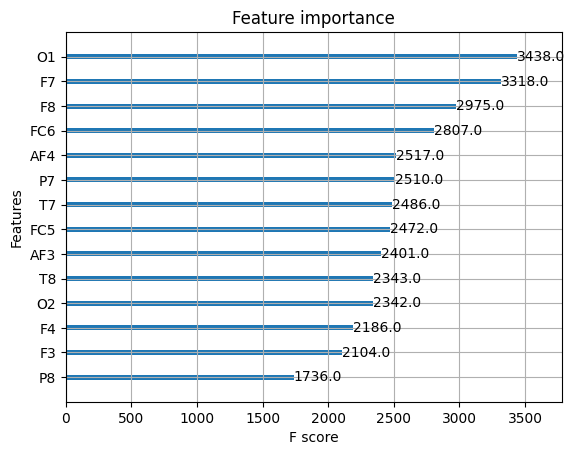

In [49]:
from xgboost import plot_importance
plot_importance(XGB_model)
plt.show()

In [50]:
XGB_model.save_model("XGB_model.json")

In [51]:
xgb_2 = XGBClassifier()
xgb_2.load_model("XGB_model.json")

In [52]:
y_predict = xgb_2.predict(X_test)
accuracy_score(y_test, y_predict)

0.9532710280373832